# Sentiment Analysis 1.0

Richard Yang

In this notebook, we will first use zero-shot learning to classify the industry for sentences. 

Then we will use the pre-trained sentiment analysis model to classify the sentiment for sentences.

Then I will use the same model to analyze the sentiment overtime, and sentiment by industry accordingly.

#### Brief Introduction to Sentiment Analysis Model

The model is from HuggingFace, and the model is trained on News Articles data.

This model is the currently best performing targeted sentiment classifier for news articles. This model is also available as an easy-to-use PyPI package named NewsSentiment which will be used in this notebook.The link to the package is: https://pypi.org/project/NewsSentiment/

@InProceedings{Hamborg2021b,
  author    = {Hamborg, Felix and Donnay, Karsten},
  title     = {NewsMTSC: (Multi-)Target-dependent Sentiment Classification in News Articles},
  booktitle = {Proceedings of the 16th Conference of the European Chapter of the Association for Computational Linguistics (EACL 2021)},
  year      = {2021},
  month     = {Apr.},
  location  = {Virtual Event},
}

In [ ]:
# Load the Drive helper and mount
import numpy as np
from google.colab import drive
import os
# This will prompt for authorization.
drive.mount('/content/drive/')
path_gdrive = '/content/drive/MyDrive/NLP/NLPcode/Final Project'
os.chdir(path_gdrive)
print(os.getcwd())

Mounted at /content/drive/
/content/drive/MyDrive/NLP/NLPcode/Final Project


In [ ]:
import os
import numpy as np
import pandas as pd
import requests
import tensorflow as tf
import re
import string
pd.set_option('display.max_colwidth', None)

In [ ]:
!pip install ktrain --upgrade
import ktrain

In [ ]:
path_zsl = './'

if not os.path.isdir(path_zsl): os.mkdir(path_zsl)

In [ ]:
import pandas as pd


# Read only the 'title' column from the parquet file
df_title = pd.read_parquet('sentences.parquet', columns=['title'])

# Drop duplicate titles
df_title = df_title.drop_duplicates()

# Display the DataFrame
print(df_title)

# Get the shape of the DataFrame
print(df_title.shape)

                                                                                                                              title
0                                     Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online
10             Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament
11       Forget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek
13                       Strategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net
32                       MulticoreWare Inc. Becomes CEVA’s Trusted Partner for Imaging & Computer Vision – Consumer Electronics Net
...                                                                                                                             ...
1164748                                 Artificial intelligence could soon d

In [ ]:
industry_list = [
    "Technology",
    "Healthcare",
    "Finance",
    "Retail",
    "Automotive",
    "Hospitality",
    "Education",
    "Energy",
    "Entertainment",
    "Manufacturing",
    "Telecommunications",
    "Transportation",
    "Agriculture",
    "Construction",
    "Pharmaceuticals",
    "Real Estate",
    "Media",
    "Food and Beverage",
    "Insurance",
    "Fashion"
]

In [ ]:
zsl = ktrain.text.ZeroShotClassifier()

In [ ]:

# df_title.drop_duplicates(subset = 'title')
# df_title.shape
df_title_sample = df_title.sample(n=20000,random_state=1)
# df_sentence_sample = df_sentence_sample[['title']]

In [ ]:
%%time
import pandas as pd
import ktrain
from ktrain.text.zsl import ZeroShotClassifier


# Define the industry labels
labels = ['healthcare', 'finance', 'retail', 'automotive', 'hospitality',
          'education', 'energy', 'entertainment', 'manufacturing', 'telecommunications',
          'transportation', 'agriculture', 'construction', 'pharmaceuticals', 'real estate',
          'media', 'food and beverage', 'insurance', 'fashion']


# Initialize the ZeroShotClassifier
zsl = ZeroShotClassifier()

# Create a list to store the predicted industries
predicted_industries = []

# Iterate over each title in the DataFrame
for title in df_title_sample['title']:
    # Predict the industry using zero-shot classification
    result = zsl.predict(title, labels, include_labels=True)
    predicted_industry = max(result, key=lambda x: x[1])[0]  # Select the industry with the highest weight
    predicted_industries.append(predicted_industry)

# Add the predicted industries as a new column in the DataFrame
df_title_sample['predicted_industry'] = predicted_industries

# Display the DataFrame with the predicted industries
print(df_title_sample.head())

                                                                                                                                                                                                                                                                      title  \
935507                                                                                                                                                                                                                ChatGPT accessible again in Italy – The Frontier Post   
996456                                                                                                                                                                         Canon put AI cameras in its Chinese offices that only let smiling workers inside - The Verge   
978598                                                                                                                                                                                 OODA

In [ ]:
df_title_sample.to_csv('df_title_sample')

In [ ]:
# Read only the 'title' column from the parquet file
df_sentence = pd.read_parquet('sentences.parquet')

In [ ]:
df_title_sample = pd.read_csv('df_title_sample.csv',lineterminator='\n')
df_title_sample

,Unnamed: 0,title,predicted_industry
0,935507,ChatGPT accessible again in Italy – The Frontier Post,telecommunications
1,996456,Canon put AI cameras in its Chinese offices that only let smiling workers inside - The Verge,media
2,978598,OODA Loop - Machine Learning And Artificial Intelligence: Implementation In Practice,automotive
3,1033817,"Conversational AI Platform Market 2020 Growth Overview by Various Services, Types, Application, Advancements, Major-Segments, Demand Insights and Comprehensive Analysis 2025 – Murphy's Hockey Law",media
4,687257,"Global Artificial Intelligence (AI) in Cyber Security Market 2025: BAE Systems, Cisco Systems, Fortinet, FireEye, Check Point Software Technologies, IBM Corporation, RSA Security, Symantec Corporation, Juniper Network, Palo Alto Networks – The Bisouv Network",telecommunications
...,...,...,...
19995,1127951,Report: AI will create more jobs than it destroys by 2020,media
19996,847540,Amex and Microsoft turn to AI to make expense reports less horrible – FocusTechnica,finance
19997,391662,The Role Of Explainable AI In Increasing Inclusion In Talent,education
19998,432390,"Indore: ​IIT-I to help West Discom with AI, machine learning tools",telecommunications


In [ ]:
df_sentence_industry = df_sentence.merge(df_title_sample, on='title', how='left')

In [ ]:
df_sentence_industry = df_sentence_industry.dropna(subset=['predicted_industry'])
df_sentence_industry

,url,title,date,sentence,keyword,Unnamed: 0,predicted_industry
10,http://newsparliament.com/2020/02/27/children-with-autism-saw-their-learning-and-social-skills-boosted-after-playing-with-this-ai-robot/,Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament,2020-02-27,"Like it Did in Italy,Levi Strauss marks the next phase in corporate paid leave policies,Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot,Author Recent Posts admin Latest posts by admin (see all)",AI,10.0,education
32,http://www.peripherals.consumerelectronicsnet.com/multicoreware-inc-becomes-cevas-trusted-partner-for-imaging-computer-vision/,MulticoreWare Inc. Becomes CEVA’s Trusted Partner for Imaging & Computer Vision – Consumer Electronics Net,2021-02-25,"JOSE, Calif.–(BUSINESS WIRE)–#ADAS–MulticoreWare Inc., joins CEVA, the leading licensor of sensor-hub Digital Signal Processors, AI engines and complementary framework & various software SDK’s, as their trusted partner to enable services on all computing platforms by implementing optimized kernels and frameworks in CEVA’s pipeline.,MulticoreWare has implemented and optimized kernels on CEVA’s platforms (e.g., XM4, XM6, Home Security & Surveillance, Healthcare, Augmented Reality, SLAM, and many more.",AI,32.0,media
33,http://www.peripherals.consumerelectronicsnet.com/multicoreware-inc-becomes-cevas-trusted-partner-for-imaging-computer-vision/,MulticoreWare Inc. Becomes CEVA’s Trusted Partner for Imaging & Computer Vision – Consumer Electronics Net,2021-02-25,"”,MulticoreWare delivers software IP Solutions and Engineering Services serving a wide group of customers with Compilers & Toolchains, Libraries for SDK, Video codec solutions, and AI analytics solutions using various vision & non-vision (Radar, LiDAR, IMU, GPS, etc.) sensors on various heterogenous computing platforms.",AI,32.0,media
77,https://africa.com/calling-all-startups-in-the-ai-space-2/,Calling All Startups in the AI Space - Africa.com,2021-04-03,The Artificial Intelligence for Development in Africa (AI4D Africa) programme and Villgro Africa have launched a call for innovative startups harnessing the power of artificial intelligence (AI) for the continent’s development.,AI,77.0,media
78,https://africa.com/calling-all-startups-in-the-ai-space-2/,Calling All Startups in the AI Space - Africa.com,2021-04-03,"The AI4D Africa programme is a joint endeavour between the Swedish International Development Agency (Sida) and the International Development Research Centre (IDRC) Canada to support innovations, policy research, and skills to spur responsible AI development in Africa.",AI,77.0,media
...,...,...,...,...,...,...,...
1164717,https://www.wvnews.com/wvu-ai-company-datarobot-announce-partnership/article_b032482b-3958-5524-a185-6d1f44e09dcf.html,"WVU, AI company DataRobot announce partnership | | wvnews.com",2021-06-11,"WVU, DataRobot,West Virginia University President Gordon Gee speaks Wednesday at the Erickson Alumni Center in Morgantown, to announce the university's partnership with AI company DataRobot.,Gov.",AI,1164716.0,education
1164718,https://www.wvnews.com/wvu-ai-company-datarobot-announce-partnership/article_b032482b-3958-5524-a185-6d1f44e09dcf.html,"WVU, AI company DataRobot announce partnership | | wvnews.com",2021-06-11,"“The DataRobot enterprise AI platform accelerates and democratizes data science by automating the end-to-end journey from data to value,” according to the company’s website.",AI,1164716.0,education
1164719,https://www.wvnews.com/wvu-ai-company-datarobot-announce-partnership/article_b032482b-3958-5524-a185-6d1f44e09dcf.html,"WVU, AI company DataRobot announce partnership | | wvnews.com",2021-06-11,"“DataRobot provides a centrally governed platform that gives you the power of AI to drive better business outcomes and is available on your cloud platform-of-choice, on-premise, or as a fully-managed service.",AI,1164

In [ ]:
# df_sentence_industry.to_csv('df_sentence_industry')

In [ ]:
df_sentence_industry['predicted_industry'].value_counts()

media                 92031
telecommunications    46102
finance               29826
healthcare            25118
education             14999
energy                 8763
manufacturing          7953
transportation         6973
entertainment          6840
automotive             3031
insurance              2945
pharmaceuticals        2701
retail                 2111
agriculture            2100
construction           2012
food and beverage      1377
real estate            1290
fashion                 768
hospitality             216
Name: predicted_industry, dtype: int64

## Sentiment Analysis By Industry

In [ ]:
# !pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModel, pipeline
tokenizer = AutoTokenizer.from_pretrained("avichr/heBERT_sentiment_analysis") #same as 'avichr/heBERT' tokenizer
model = AutoModel.from_pretrained("avichr/heBERT_sentiment_analysis")


Some weights of the model checkpoint at avichr/heBERT_sentiment_analysis were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
sentiment_analysis = pipeline(
    "sentiment-analysis",
    model="avichr/heBERT_sentiment_analysis",
    tokenizer="avichr/heBERT_sentiment_analysis",
    return_all_scores = True
)


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


## Read the Sentence data

In [ ]:
# Read only the 'title' column from the parquet file
import pandas as pd
df_sentences = pd.read_parquet('sentences.parquet')
df_sentences_sentiment = df_sentences.copy()

In [ ]:
from transformers import pipeline

# Function to analyze sentiment for a given sentence
def analyze_sentiment(sentence):
    max_length = 512
    if len(sentence) > max_length:
        # Truncate long sentences to the maximum length
        sentence = sentence[:max_length]
    result = sentiment_analysis(sentence)
    return result

# Apply sentiment analysis to the 'sentence' column in the DataFrame
df_sentences_sentiment['sentiment'] = df_sentences_sentiment['sentence'].apply(analyze_sentiment)


In [ ]:
# Define a lambda function to calculate prob_pos and prob_neg
def calculate_prob(row):
    sentiment_list = row
    prob_pos = None
    prob_neg = None

    if isinstance(sentiment_list, list) and len(sentiment_list) > 0:
        sentiment_dict = sentiment_list[0]
        positive_score = None
        neutral_score = None
        negative_score = None

        for sentiment in sentiment_dict:
            if sentiment['label'] == 'positive':
                positive_score = sentiment['score']
            elif sentiment['label'] == 'neutral':
                neutral_score = sentiment['score']
            elif sentiment['label'] == 'negative':
                negative_score = sentiment['score']
        
        if positive_score is not None and neutral_score is not None:
            prob_pos = positive_score + (neutral_score / 2)
        
        if negative_score is not None and neutral_score is not None:
            prob_neg = negative_score + (neutral_score / 2)

    return (prob_pos, prob_neg)

# Apply the lambda function to create new columns
df_sentences_sentiment[['prob_pos', 'prob_neg']] = df_sentences_sentiment['sentiment'].apply(calculate_prob).apply(pd.Series)

# Display the updated DataFrame
print(df_sentences_sentiment.head())


         date  \
0  2023-04-24   
1  2020-07-13   
2  2022-09-26   
3  2021-01-07   
4  2023-03-02   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              sentence  \
0                                                                                                                                                                                                                                                                                                                                                     According to Yacine Jernite, who leads the Machin

In [ ]:
# Drop the previous 'sentiment' column
df_sentences_sentiment.drop('sentiment', axis=1, inplace=True)

# Define a lambda function to determine sentiment based on prob_pos
def determine_sentiment(prob_pos):
    if prob_pos > 0.5:
        return 'positive'
    else:
        return 'negative'

# Create a new 'sentiment' column based on prob_pos values
df_sentences_sentiment['sentiment'] = df_sentences_sentiment['prob_pos'].apply(determine_sentiment)

# Display the updated DataFrame
print(df_sentences_sentiment.head())


         date  \
0  2023-04-24   
1  2020-07-13   
2  2022-09-26   
3  2021-01-07   
4  2023-03-02   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              sentence  \
0                                                                                                                                                                                                                                                                                                                                                     According to Yacine Jernite, who leads the Machin

Now we have predicted industry, and comprehensive sentiment analysis for each sentence, we can forward to the next step and formally start the sentiment analysis over time and industry.

In [ ]:
import pandas as pd

# Select the relevant columns from the DataFrame
df_sentence_industry_grouped = df_sentences_sentiment[['date', 'predicted_industry', 'prob_pos', 'prob_neg']]

# Calculate the weighted average of prob_pos - prob_neg for each group
weighted_avg = df_sentence_industry_grouped.groupby(['date', 'predicted_industry'])['prob_pos', 'prob_neg'].apply(lambda x: (x['prob_pos'] - x['prob_neg']).mean())

# Convert weighted_avg to a DataFrame
weighted_avg_df = pd.DataFrame(weighted_avg, columns=['weighted_average_sentiment']).reset_index()

# Display the updated DataFrame
print(weighted_avg_df.head(50))


In [ ]:
# Group the DataFrame by 'predicted_industry' and calculate the mean sentiment
grouped_df_alltime = weighted_avg_df.groupby('predicted_industry')['weighted_average_sentiment'].mean()

# Sort the DataFrame in descending order based on 'weighted_average_sentiment'
top_5_industries = grouped_df_alltime.sort_values(ascending=False).head(5)

# Display the top 5 industries
print(top_5_industries)


predicted_industry
agriculture       -0.061767
pharmaceuticals   -0.084816
entertainment     -0.087807
automotive        -0.094015
fashion           -0.099390
Name: weighted_average_sentiment, dtype: float64


/tmp/ipykernel_359/3171928968.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = weighted_avg_df.groupby([weighted_avg_df['date'].dt.to_period('M'), 'predicted_industry']).mean()


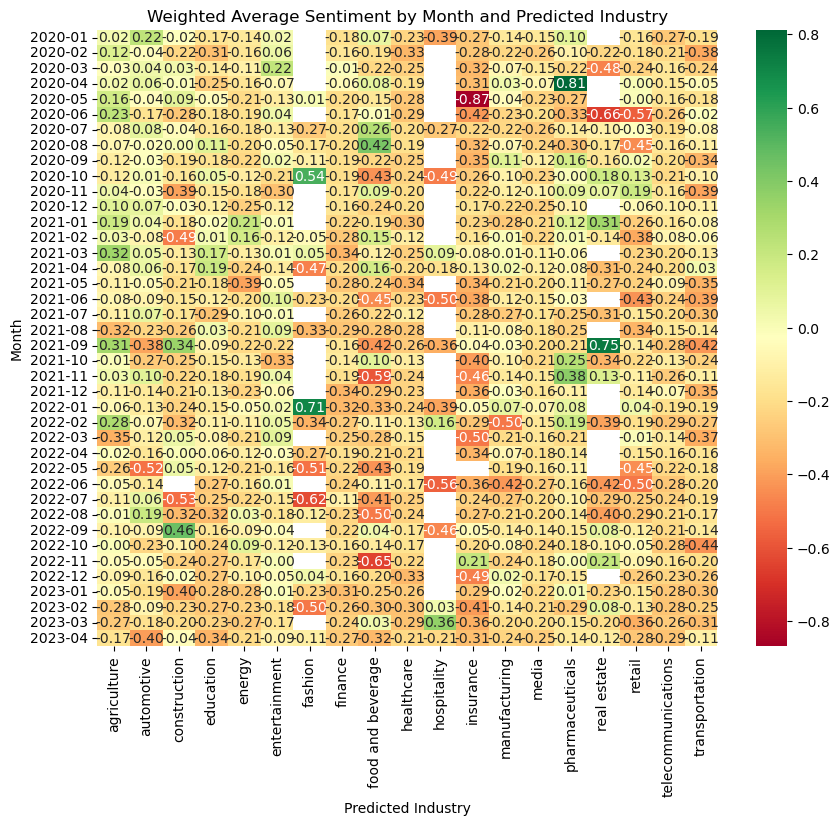

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'date' column to datetime format
weighted_avg_df['date'] = pd.to_datetime(weighted_avg_df['date'])

# Group the DataFrame by date (by month) and predicted_industry, and calculate the mean
grouped_df = weighted_avg_df.groupby([weighted_avg_df['date'].dt.to_period('M'), 'predicted_industry']).mean()

# Reset the index to convert the grouped DataFrame into a regular DataFrame
grouped_df = grouped_df.reset_index()

# Pivot the DataFrame to create a pivot table for plotting
pivot_df = grouped_df.pivot(index='date', columns='predicted_industry', values='weighted_average_sentiment')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Weighted Average Sentiment by Month and Predicted Industry')
plt.xlabel('Predicted Industry')
plt.ylabel('Month')
plt.show()


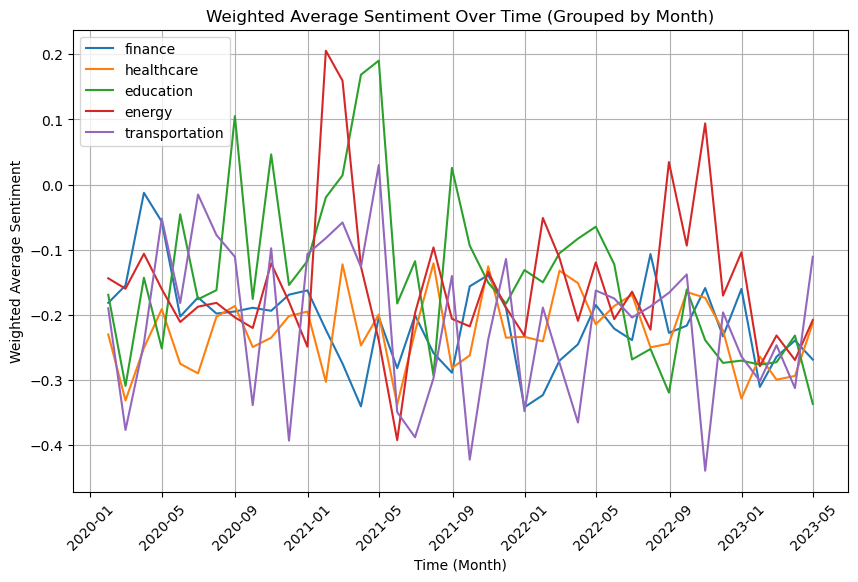

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' column to datetime format
weighted_avg_df['date'] = pd.to_datetime(weighted_avg_df['date'])

# Filter the DataFrame for the specific industries
selected_industries = ['finance', 'healthcare', 'education', 'energy', 'transportation']
filtered_df = weighted_avg_df[weighted_avg_df['predicted_industry'].isin(selected_industries)]

# Group the data by month and predicted industry, and calculate the mean
grouped_df = filtered_df.groupby([pd.Grouper(key='date', freq='M'), 'predicted_industry'])['weighted_average_sentiment'].mean().reset_index()

# Plot the line chart for each selected industry
plt.figure(figsize=(10, 6))
for industry in selected_industries:
    industry_data = grouped_df[grouped_df['predicted_industry'] == industry]
    plt.plot(industry_data['date'], industry_data['weighted_average_sentiment'], label=industry)

plt.title('Weighted Average Sentiment Over Time (Grouped by Month)')
plt.xlabel('Time (Month)')
plt.ylabel('Weighted Average Sentiment')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
